In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
sns.set()
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
y=df["Exited"]
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

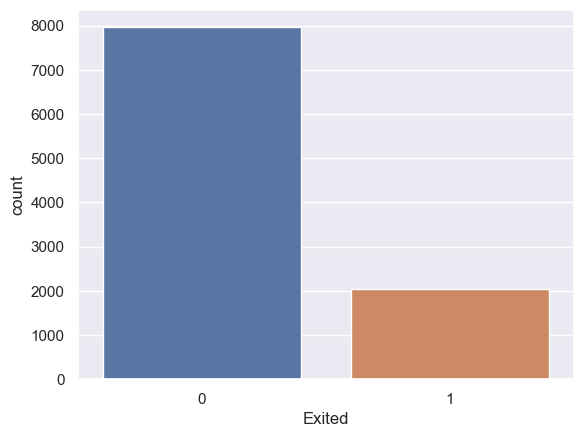

In [4]:
sns.countplot(x=y);

In [5]:
ss=StandardScaler()
x_scaler=ss.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=0)

In [6]:
#Let us create the Neural Network
classifier = Sequential()
classifier.add(Dense(6, activation = 'relu', input_shape = (x_train.shape[1], )))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(6, activation = 'relu'))
classifier.add(Dropout(rate = 0.1))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [7]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = classifier.fit(x_train, y_train, epochs = 200, validation_split = 0.1)

Epoch 1/200
211/211 [==============================] - 2s 3ms/step - loss: 0.5819 - accuracy: 0.7261 - val_loss: 0.5008 - val_accuracy: 0.7960
Epoch 2/200
211/211 [==============================] - 0s 1ms/step - loss: 0.4913 - accuracy: 0.7960 - val_loss: 0.4694 - val_accuracy: 0.7960
Epoch 3/200
211/211 [==============================] - 0s 2ms/step - loss: 0.4738 - accuracy: 0.7972 - val_loss: 0.4538 - val_accuracy: 0.7960
Epoch 4/200
211/211 [==============================] - 0s 2ms/step - loss: 0.4643 - accuracy: 0.7976 - val_loss: 0.4443 - val_accuracy: 0.7960
Epoch 5/200
211/211 [==============================] - 0s 2ms/step - loss: 0.4558 - accuracy: 0.8034 - val_loss: 0.4384 - val_accuracy: 0.8013
Epoch 6/200
211/211 [==============================] - 1s 2ms/step - loss: 0.4466 - accuracy: 0.8086 - val_loss: 0.4307 - val_accuracy: 0.8080
Epoch 7/200
211/211 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.8130 - val_loss: 0.4254 - val_accuracy: 0.8120

In [8]:
y_pred = classifier.predict(x_test)
print(y_pred[:5])

79/79 [==============================] - 0s 2ms/step
[[0.15096526]
 [0.33061725]
 [0.24360956]
 [0.15869051]
 [0.10815001]]


In [9]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1960   31]
 [ 332  177]]


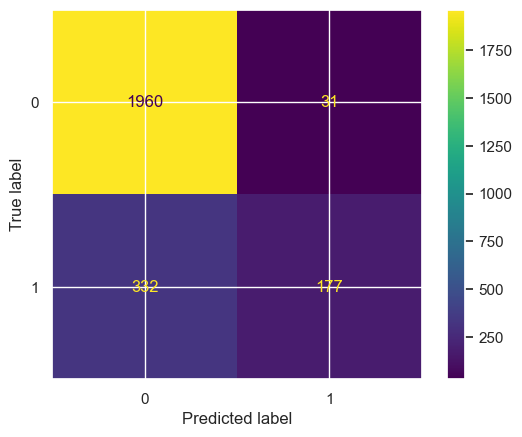

In [11]:
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

In [12]:
print(((cm[0][0] + cm[1][1])* 100) / len(y_test), '% of data was classified correctly')
print((cm[0][0]+cm[1][1])*100/len(y_test),"accuracy is following")

85.48 % of data was classified correctly
85.48 accuracy is following
